In [3]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

## New material

### Probability Question 1

$P(\{Q, K\})$

- Solution with equally likely outcomes:

$$\{A, Q\}, \{A, K\}, \{K, Q\}, \{K, A\}, \textbf{\{Q, K\}}, \{Q, A\}$$

so $P(\{Q, K\})$ = $\frac{1}{6}$

Another solution: $P(\{Q, K\})$ = $P(Q \text{ on first draw}) * P(K \text{ on second draw})$  = $\frac{1}{3} * \frac{1}{2} = \frac{1}{6}$

- This solution uses the **multplication rule**.

**STOP**

### Probability Question 2

- Solution with equally likely outcomes:

$$\{A, Q\}, \{A, K\}, \{K, Q\}, \{K, A\}, \textbf{\{Q, K\}}, \{Q, A\}, \{K, K\}, {\{A, A\}}, \{Q, Q\}$$

so $P(\{Q, K\})$ = $\frac{1}{9}$

Another solution: $P(\{Q, K\})$ = $P(Q \text{ on first draw}) * P(K \text{ on second draw})$  = $\frac{1}{3} * \frac{1}{3} = \frac{1}{9}$
- This solution uses the **multplication rule**.

**STOP**

### Probability Question 3

- Solution with equally likely outcomes:

$$\{A, Q\}, \{A, K\}, \textbf{\{K, Q\}}, \{K, A\}, \textbf{\{Q, K\}}, \{Q, A\}$$

so $P(\{Q, K\})$ = $\frac{2}{6}$

Another solution: The two bolded outcomes are distinct (they cannot happen at the same time). So we have that

$P(\text{ending up with } Q \text{ and } K)$ = $P(\{Q, K\})$ + $P(\{K, Q\})$ = $\frac{1}{6} + \frac{1}{6} = \frac{2}{6} = \frac{1}{3}$
- This solution uses the **addition rule**.

**STOP**

### Probability Question 4

- Solution with equally likely outcomes:

$$\textbf{\{A, Q\}}, \textbf{\{A, K\}}, \{K, Q\}, \textbf{\{K, A\}}, \{Q, K\}, \textbf{\{Q, A\}}$$

so $P(\{Q, K\})$ = $\frac{4}{6}$

Another solution: 
- The pair of cards either contains an ace or it does not.
- We already found the probability that the pair does not contain an ace. What is it? (30 sec-1 min)

$P(\text{ending up with at least one } A)$ = $1$ - ($P(\{Q, K\})$ + $P(\{K, Q\})$ = $\frac{4}{6}$ = $\frac{2}{3}$
- This solution uses the **complement rule**.

**STOP**

### The Monty Hall Problem is great to simulate! ###

In [6]:
goats = make_array('first goat', 'second goat')
doors = make_array('car', 'first goat', 'second goat')
doors

array(['car', 'first goat', 'second goat'],
      dtype='<U11')

A goat is always revealed. First, we'll define a function that determines which goat is revealed.

In [5]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [7]:
make_array(other_goat('first goat'), other_goat('second goat'))

array(['second goat', 'first goat'],
      dtype='<U11')

In [8]:
def monty_hall():
    """Return 
    [contestant's guess, what Monty reveals, 
    what remains behind the other door]"""
    
    #Contest randonmly chooses one of the three doors
    contestant_choice = np.random.choice(doors)

    #Scenario #1 - Contest chooses the first goat
    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_choice = 'car'
        
    #Scenario #2 - Content chooses the second goat
    elif contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_choice = 'car'
    
   #Scenario #3 - Contestant chooses the car
    elif contestant_choice == 'car':
        monty_choice = np.random.choice(goats)
        remaining_choice = other_goat(monty_choice)
        
    return make_array(contestant_choice, monty_choice, remaining_choice)

In [9]:
monty_hall()

array(['first goat', 'second goat', 'car'],
      dtype='<U11')

In [10]:
results = Table(make_array("Contestant's Choice", "Monty's Choice", 'Remaining'))
results

Contestant's Choice,Monty's Choice,Remaining


In [11]:
results = Table(make_array("Contestant's Choice", "Monty's Choice", 'Remaining'))

for i in np.arange(10000):
    # this is the table method append-- not the numpy (array method) append
    # with the table method, you do not need to save the table back into itself
    results.append(monty_hall())


In [12]:
results.show(3)

Contestant's Choice,Monty's Choice,Remaining
second goat,first goat,car
first goat,second goat,car
first goat,second goat,car


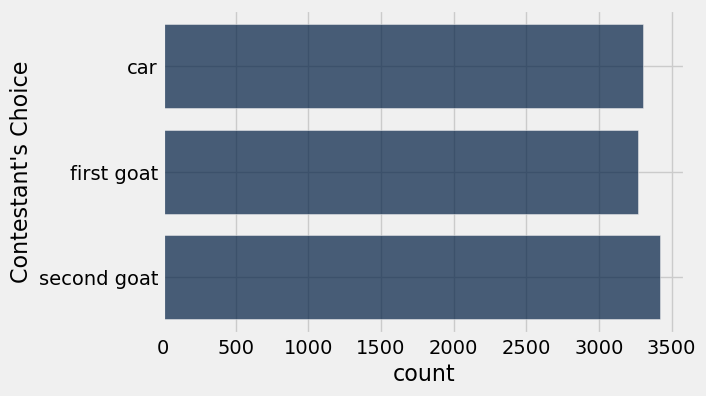

In [13]:
results.group("Contestant's Choice").barh("Contestant's Choice")

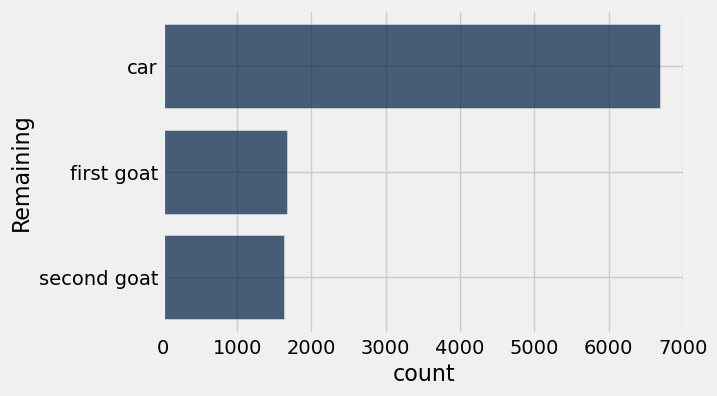

In [14]:
results.group('Remaining').barh('Remaining')

In [23]:
results_grouped = results.group('Remaining')

In [24]:
results_grouped

Remaining,count
car,6693
first goat,1672
second goat,1635


Remember a variant of this function from earlier in the course?

In [19]:
def proportions(s):    
    """given an array, 
    give us the proportion that each element in the array contributes to the total"""
    return np.round(s / sum(s), 2)

In [25]:
proportions(results_grouped.column('count'))

array([ 0.67,  0.17,  0.16])

______

### Challenge Task
- Use simulation to corroborate the results we got for Questions 1 and 3 earlier in this demo.

In [ ]:
cards = make_array('A', 'K', 'Q')
cards

In [ ]:
np.random.choice(cards, 2, replace=False)

You could have also made an array of size six and drawn from this six times.

In [ ]:
#Defining a function to simulate the game
def three_card_game():
    two_cards_drawn = np.random.choice(cards, 2, replace=False)
    return make_array(two_cards_drawn.item(0), two_cards_drawn.item(1))

In [ ]:
three_card_game()

In [ ]:
results = Table(make_array('First Card', 'Second Card'))
results

Repeat the simulation 10,000 times.

In [ ]:
for i in np.arange(10000):
    results.append(three_card_game())
results.show(5)

Getting the count of each unique 2 card combinations from the simulations

In [ ]:
results_grouped = results.group(make_array('First Card','Second Card'))
results_grouped

Let's see if the number of unique combinations is what we wrote above.

In [ ]:
unique_combinations = results_grouped.num_rows
unique_combinations

How many times each combination appeared

In [ ]:
card_counts = results_grouped.column('count')

How many total simulations were conducted


In [ ]:
total_simulations = sum(results_grouped.column('count'))

Updating the table to contain the proportion of times each combination appeared

In [ ]:
results_grouped = results_grouped.with_column('Proportion',(card_counts/total_simulations))
results_grouped

This justifies our earlier calculations. The proportion of $\{Q, K\}$ is approximately $\frac{1}{6}$, and the combined proportion of either $\{Q, K\}$ or  $\{K, Q\}$ is $\frac{2}{6} = \frac{1}{3}$.

## Review

#### Discussion Question: 
Examine the following code and its `for` loop. What changes should be made to the code? I see three!

##### **Task**: compute a running total of the integers 1 through $k$. In this case, $k$ is 5.

- So, the running `total` should be $1+2+3+4+5$!

In [8]:
total = 0

for i in make_array(1,2,3,4,5):
    total = i + total

5

In [6]:
total

15